### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

In [2]:
df = pd.read_csv('C:/Users/oyeye/Downloads/try-it_6.2_starter/data/telco_churn_data.csv')

In [3]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [5]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


<AxesSubplot:>

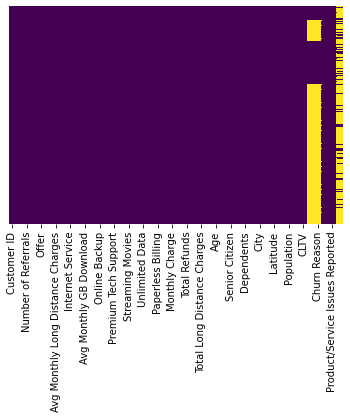

In [6]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')

In [7]:
df['Churn Category'].value_counts()

Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: Churn Category, dtype: int64

In [11]:
new_df = df.dropna(axis = 1, how = 'any')

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [19]:
ndf = new_df.drop(['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude'], axis = 1)

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [24]:
le = preprocessing.LabelEncoder()

In [30]:
ndf1 = ndf.apply(LabelEncoder().fit_transform)

In [31]:
ndf1.head(5)

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,0,0,0,0,0,0,0,1,2,8,...,0,1,0,0,0,1525,1,2640,5,0
1,1,1,7,5,1,3499,1,1,0,18,...,0,1,1,1,1,1454,1,2526,5,0
2,0,0,17,4,1,768,1,1,2,44,...,0,1,0,1,3,1382,1,827,1,0
3,1,1,24,3,1,1383,0,1,2,12,...,0,1,1,1,1,1036,1,2553,1,1
4,1,1,36,3,1,405,1,1,0,14,...,0,1,1,1,1,1006,1,550,1,0


In [32]:
ndf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Referred a Friend                  7043 non-null   int32
 1   Number of Referrals                7043 non-null   int64
 2   Tenure in Months                   7043 non-null   int64
 3   Offer                              7043 non-null   int32
 4   Phone Service                      7043 non-null   int32
 5   Avg Monthly Long Distance Charges  7043 non-null   int64
 6   Multiple Lines                     7043 non-null   int32
 7   Internet Service                   7043 non-null   int32
 8   Internet Type                      7043 non-null   int32
 9   Avg Monthly GB Download            7043 non-null   int64
 10  Online Security                    7043 non-null   int32
 11  Online Backup                      7043 non-null   int32
 12  Device Protection Pl

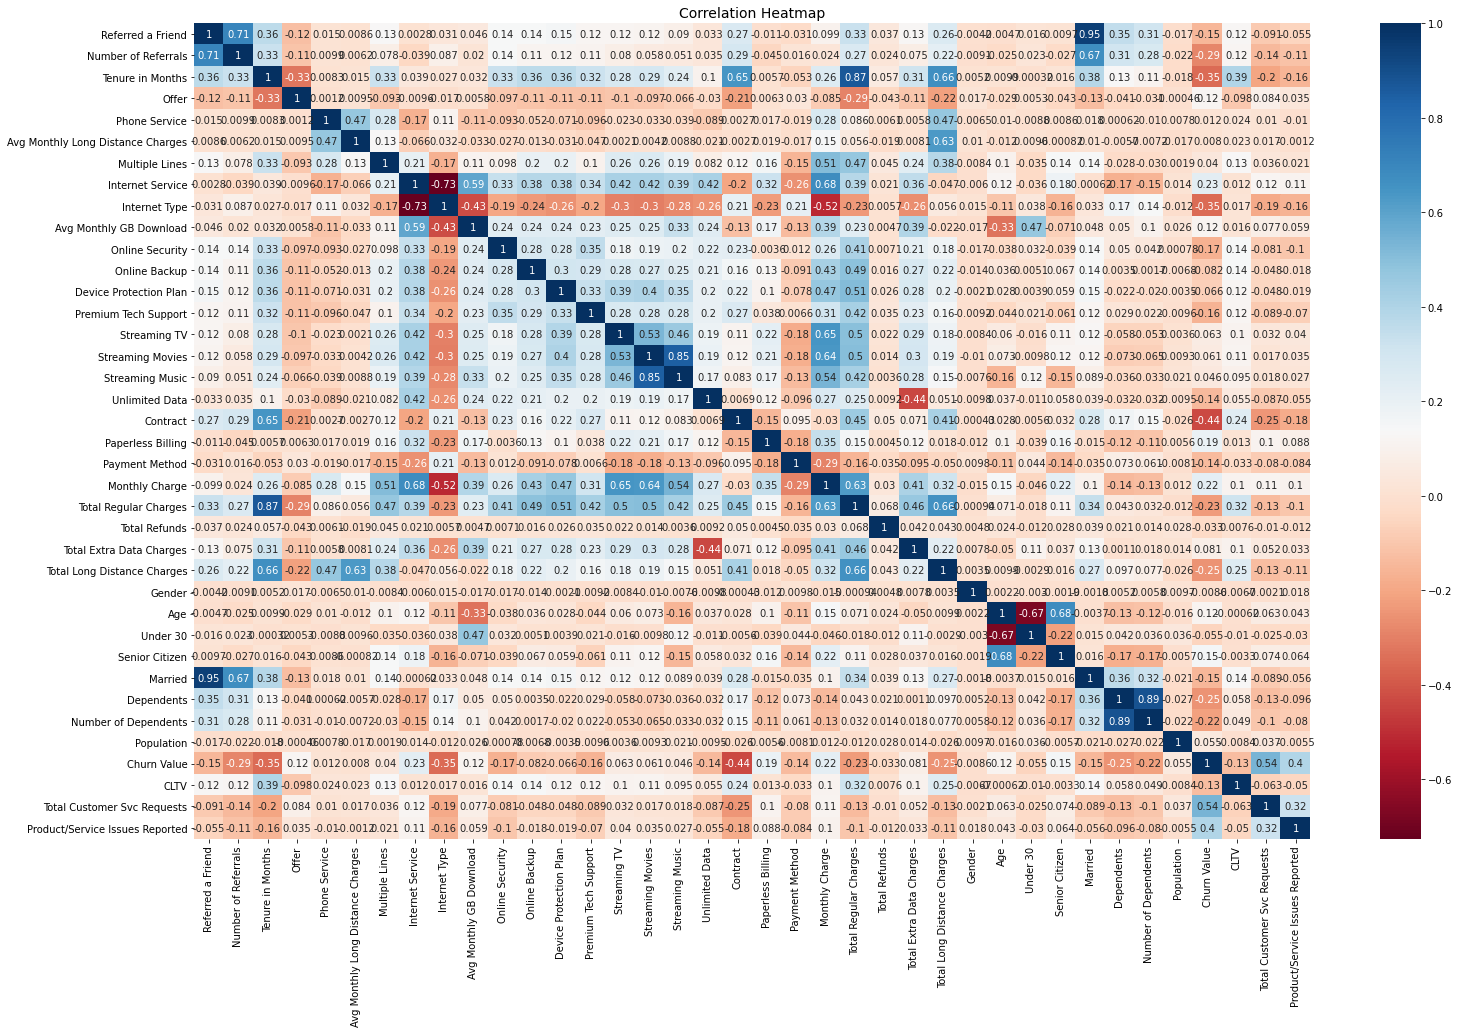

In [40]:
plt.figure(figsize = (25, 15))
sns.heatmap(ndf1.corr(), annot = True, cmap = 'RdBu')
plt.title('Correlation Heatmap',fontsize = 14)
plt.yticks(rotation = 0)
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
data_scaler = StandardScaler()

In [44]:
ndf2 = data_scaler.fit_transform(ndf1)

In [45]:
ndf2

array([[-0.91827815, -0.65040855, -1.27898775, ...,  0.89474153,
         2.55963454, -0.42944001],
       [ 1.08899466, -0.31718476, -0.99374288, ...,  0.77355328,
         2.55963454, -0.42944001],
       [-0.91827815, -0.65040855, -0.58625021, ..., -1.03257686,
        -0.23684511, -0.42944001],
       ...,
       [ 1.08899466,  0.6824866 ,  1.61421021, ...,  1.01805589,
         0.4622748 , -0.42944001],
       [ 1.08899466, -0.31718476, -0.87149508, ..., -1.32704305,
        -0.93596502, -0.42944001],
       [-0.91827815, -0.65040855,  1.36971461, ...,  0.58114036,
        -0.23684511,  2.35815996]])

In [46]:
ndf2_std = pd.DataFrame(data = ndf2, columns = ndf1.columns)

In [47]:
ndf2_std

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,-0.918278,-0.650409,-1.278988,-0.764620,-3.054010,-1.448097,-0.854176,0.525927,0.435333,-0.624260,...,-0.498313,2.273159,-0.966622,-0.548093,-0.486835,1.574796,1.663829,0.894742,2.559635,-0.42944
1,1.088995,-0.317185,-0.993743,1.970105,0.327438,1.687791,1.170719,0.525927,-1.453793,-0.001353,...,-0.498313,2.273159,1.034530,1.824507,0.551874,1.420623,1.663829,0.773553,2.559635,-0.42944
2,-0.918278,-0.650409,-0.586250,1.423160,0.327438,-0.759796,1.170719,0.525927,0.435333,1.618205,...,-0.498313,2.273159,-0.966622,1.824507,2.629292,1.264279,1.663829,-1.032577,-0.236845,-0.42944
3,1.088995,-0.317185,-0.301005,0.876215,0.327438,-0.208619,-0.854176,0.525927,0.435333,-0.375097,...,-0.498313,2.273159,1.034530,1.824507,0.551874,0.512959,1.663829,0.802256,-0.236845,0.96436
4,1.088995,-0.317185,0.187986,0.876215,0.327438,-1.085126,1.170719,0.525927,-1.453793,-0.250516,...,-0.498313,2.273159,1.034530,1.824507,0.551874,0.447816,1.663829,-1.327043,-0.236845,-0.42944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.918278,-0.650409,1.614210,-0.764620,0.327438,-0.024893,-0.854176,-1.901403,1.379896,-1.122586,...,-0.498313,-0.439916,-0.966622,-0.548093,-0.486835,-0.898481,-0.601023,0.775679,-0.935965,-0.42944
7039,1.088995,-0.317185,-0.341755,0.876215,0.327438,0.844444,1.170719,0.525927,-0.509230,0.310100,...,-0.498313,-0.439916,1.034530,1.824507,1.590583,0.100384,-0.601023,-1.804355,0.462275,-0.42944
7040,1.088995,0.682487,1.614210,-0.764620,0.327438,0.422323,1.170719,0.525927,-1.453793,1.742787,...,-0.498313,-0.439916,1.034530,1.824507,1.590583,-1.717115,-0.601023,1.018056,0.462275,-0.42944
7041,1.088995,-0.317185,-0.871495,-0.764620,-3.054010,-1.448097,-0.854176,0.525927,-0.509230,-0.125935,...,-0.498313,-0.439916,1.034530,1.824507,1.590583,-1.502142,-0.601023,-1.327043,-0.935965,-0.42944


In [51]:
pca = PCA()
pca.fit(ndf2_std)

PCA()

In [52]:
pca.explained_variance_ratio_

array([0.17674262, 0.11655652, 0.06954809, 0.05704113, 0.05556169,
       0.04006441, 0.0336815 , 0.03340304, 0.02902589, 0.02828718,
       0.02688556, 0.02620969, 0.02546888, 0.0237975 , 0.02182291,
       0.02126898, 0.02058699, 0.01976009, 0.01845288, 0.01780053,
       0.0171661 , 0.0164356 , 0.01546846, 0.01436936, 0.01214747,
       0.01177756, 0.01058523, 0.00880056, 0.00808961, 0.00493265,
       0.00380028, 0.00304324, 0.00296203, 0.0027092 , 0.00207629,
       0.001822  , 0.00125235, 0.00059595])

Text(0, 0.5, 'Cumulative Explained Variance')

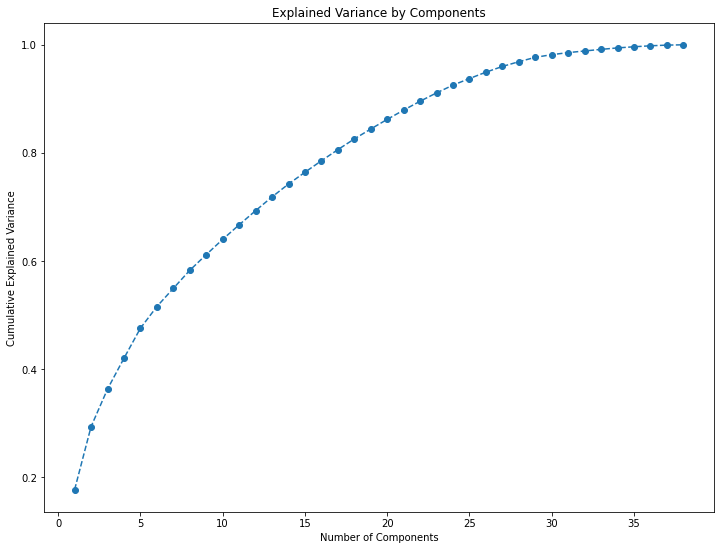

In [56]:
plt.figure(figsize = (12,9))
plt.plot(range(1, 39), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [57]:
pca = PCA(n_components = 20)
pca.fit(ndf2_std)
pca.components_

array([[ 1.50381244e-01,  1.19052012e-01,  2.61002582e-01,
        -9.72239319e-02,  2.05576471e-02,  3.31225131e-02,
         1.87720518e-01,  2.32761961e-01, -1.65832638e-01,
         1.67225366e-01,  1.80673894e-01,  2.16086213e-01,
         2.34744299e-01,  1.96640833e-01,  2.44812887e-01,
         2.60712904e-01,  2.34376101e-01,  1.18285844e-01,
         1.34247770e-01,  9.85445830e-02, -9.07118246e-02,
         3.04535303e-01,  3.45737275e-01,  2.44384890e-02,
         1.95446134e-01,  2.00961445e-01, -5.54541952e-03,
         1.92748464e-02,  1.20349116e-02,  4.83892536e-02,
         1.52678881e-01,  1.84466440e-02,  1.70585350e-02,
        -1.71480669e-03, -3.91446164e-02,  1.12206769e-01,
        -2.60610713e-02, -1.55868458e-02],
       [ 2.51634061e-01,  2.60888972e-01,  2.29467687e-01,
        -9.36733335e-02,  4.84994183e-02,  4.25889887e-02,
        -1.95103654e-02, -2.74933487e-01,  2.72219629e-01,
        -1.41959768e-01,  3.90072663e-02, -1.86402054e-02,
        -2.99

In [58]:
scores_pca = pca.transform(ndf2_std)

In [70]:
df_pca = pd.DataFrame(scores_pca)

In [72]:
df_pca.shape

(7043, 20)

In [84]:
wcss = []
for i in range(1, 50):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

In [85]:
wcss

[230691.42984185935,
 196334.8590805697,
 175156.23562723628,
 166655.69743126584,
 160343.13295849718,
 154614.35655261934,
 149058.1978665454,
 144166.07995649867,
 140865.6640612914,
 137590.90269177634,
 134966.81368728177,
 132910.39659209826,
 129738.99252102898,
 128149.57789280837,
 126148.63197691305,
 124749.86464045035,
 123730.1428283807,
 121549.24198257667,
 119503.2945150126,
 118832.49772704489,
 117183.626220831,
 116973.01621708936,
 115398.3030406148,
 115034.05771155852,
 113365.96115859163,
 112400.03048001003,
 111720.19932674107,
 110847.17448403162,
 110161.8078889406,
 109351.22752992986,
 108780.8831391105,
 107823.1441762386,
 106952.1732216217,
 106596.61181042391,
 106066.72965658156,
 105431.4317264147,
 104794.85551170852,
 104223.15658361954,
 103645.69106769635,
 103133.84274365392,
 102610.30184901862,
 101697.28896666932,
 101438.9250127838,
 100937.45841579657,
 100729.4157358507,
 99852.28120567006,
 99302.2919055068,
 99091.88883351015,
 98545.5382

In [86]:
kmeans = KMeans(n_clusters = 5, random_state = 123).fit(df_pca)
ndf2_std['clusters'] = kmeans.labels_

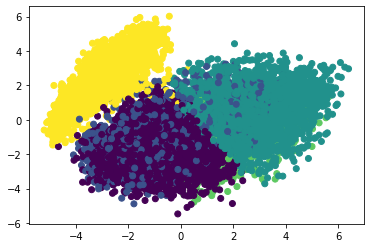

In [87]:
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c = kmeans.labels_)